In [1]:
import pandas
import ast
import datetime
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
# read dataframe
d=pandas.read_csv("data/df2020-03-18.csv")
# Convert string representation of list to list
d['values']=d['values'].apply(lambda x : ast.literal_eval(x))


In [3]:
d.head()

,Unnamed: 0,n_table,name,structureWithDailyNumbers,structureWithPopulation,values,report
0,0,1,Table,False,False,[1],Situation report - 57Coronavirus disease 2019 ...
1,1,1,cases and deaths. Data as of,False,False,[17],Situation report - 57Coronavirus disease 2019 ...
2,2,1,March,False,False,[2020],Situation report - 57Coronavirus disease 2019 ...
3,3,1,China,False,False,"[81116, 39, 3231, 13, 0]",Situation report - 57Coronavirus disease 2019 ...
4,4,1,Republic of Korea,False,False,"[8320, 84, 81, 6, 0]",Situation report - 57Coronavirus disease 2019 ...


In [4]:
# get date from report string: find ')' character and then there is the date
# d['report'].unique()
d['date']=d['report'].apply(lambda x: datetime.datetime.strptime(x[x.index(')')+1:].strip(), '%d %B %Y'))
d=d.sort_values(by=['date'])
d.head()

,Unnamed: 0,n_table,name,structureWithDailyNumbers,structureWithPopulation,values,report,date
4905,16,1,https://www.who.int/ith/2020-,False,False,[901],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21
4889,0,1,Hubei Province,False,False,[258],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21
4890,1,1,Guangdong,False,False,[14],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21
4891,2,1,Beijing Municipality,False,False,[5],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21
4892,3,1,Shanghai Municipality,False,False,[1],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21


In [5]:
# the number of confirmed cases is in values list, the position depends on the structure of the report
# (NOTE: for china's places WHO changes structure so last reports are different from the first ones)


# there should be a row for each situation report and country
# the situation reports have different structures, WHO do not keep the same structure for all the reports
# but there are some wrong records that are not related to country so detect them in order to remove them
# so try to group by report and detect for each report the wrong records
d['n_values']=d['values'].apply(lambda x: len(x))
d.head()

,Unnamed: 0,n_table,name,structureWithDailyNumbers,structureWithPopulation,values,report,date,n_values
4905,16,1,https://www.who.int/ith/2020-,False,False,[901],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1
4889,0,1,Hubei Province,False,False,[258],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1
4890,1,1,Guangdong,False,False,[14],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1
4891,2,1,Beijing Municipality,False,False,[5],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1
4892,3,1,Shanghai Municipality,False,False,[1],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1


In [6]:
d[d['name']=='Hubei']

,Unnamed: 0,n_table,name,structureWithDailyNumbers,structureWithPopulation,values,report,date,n_values
4617,0,1,Hubei,False,False,[7153],Situation report - 12Novel Coronavirus (2019-n...,2020-02-01,1
4554,0,1,Hubei,False,False,[9074],Situation report - 13Novel Coronavirus (2019-n...,2020-02-02,1
4483,0,1,Hubei,False,False,[11177],Situation report - 14 - Erratum Novel Coronavi...,2020-02-03,1
4417,0,1,Hubei,False,False,[13522],Situation report - 15Novel Coronavirus (2019-n...,2020-02-04,1
4354,0,1,Hubei,False,False,[16678],Situation report - 16 - ErratumNovel Coronavir...,2020-02-05,1
4283,0,1,Hubei,False,False,"[22, 112]",Situation report - 18Novel Coronavirus (2019-n...,2020-02-07,2
4213,0,1,Hubei,False,False,"[24, 953]",Situation report - 19Novel Coronavirus (2019-n...,2020-02-08,2
4144,0,1,Hubei,False,False,"[27, 100]",Situation report - 20Novel Coronavirus (2019-n...,2020-02-09,2
4075,0,1,Hubei,False,False,[29631],Situation report - 21Novel Coronavirus (2019-n...,2020-02-10,1
4001,0,1,Hubei,False,False,[31728],Situation report - 22Novel Coronavirus (2019-n...,2020-02-11,1


In [7]:
# set index of number of cases in values list
d['idx_cases']=-1
d.loc[~d['structureWithDailyNumbers'] & d['structureWithPopulation'],'idx_cases']=1 # this is for china data, get second value
d.loc[d['structureWithDailyNumbers'] & d['structureWithPopulation'],'idx_cases']=-2 # this is for china data, get second to last value
d.loc[d['n_table']>1,'idx_cases']=0 # records not in the first table (table not with china data) has the value in first position
d.loc[d['n_values']==1,'idx_cases']=0 # there is only one value
# this is for china data, if there is no index set than this is the case for taking first one and multiply values by 1000
chinaDataAtBeginning = (d['idx_cases']==-1) & (d['date']<datetime.datetime(2020,3,16)) # after 2020-03-16 WHO puts all in one table both china and other data
d.loc[chinaDataAtBeginning, 'values']=d.loc[chinaDataAtBeginning,'values'].apply(lambda x: [el*1000 for el in x])
d.loc[d['idx_cases']==-1,'idx_cases']=0

d.head()

,Unnamed: 0,n_table,name,structureWithDailyNumbers,structureWithPopulation,values,report,date,n_values,idx_cases
4905,16,1,https://www.who.int/ith/2020-,False,False,[901],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1,0
4889,0,1,Hubei Province,False,False,[258],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1,0
4890,1,1,Guangdong,False,False,[14],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1,0
4891,2,1,Beijing Municipality,False,False,[5],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1,0
4892,3,1,Shanghai Municipality,False,False,[1],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1,0


In [8]:
# check length limits
# not greater than length
d.loc[d['idx_cases']>=d['n_values'],'idx_cases']=d.loc[d['idx_cases']>=d['n_values'],'n_values']-1
# not lower than length
d.loc[d['idx_cases']+d['n_values']<0,'idx_cases']=0 # china data that take the third to last but there is not enough values, so take the first one

In [9]:
d['cases']=[row['values'][min(row['idx_cases'],row['n_values']-1)] for index, row in d.iterrows()]


In [10]:
d['name']=d['name'].str.replace(' Municipality','') # remove Municipality substring in order to have the same name for all reports
d['name']=d['name'].str.replace('conveyance (Japan)','(Diamond Princess)') # use only (Diamond Princess) instead of other aliases
d['name']=d['name'].str.replace('^Republic of\)$','Iran (Islamic Republic of)') # there are some records missing the first part

In [11]:
# get countries with more cases
def getCountriesWithHighestCases(d,min_cases):
    cm=d.groupby(['name']).agg({'cases':['max']})
    cm.columns = ['_'.join(col) for col in cm.columns]
    cm=cm.reset_index()
    cm=cm.sort_values(by=['cases_max'],ascending=False)
    cm=cm[cm['cases_max']>min_cases] # consider at least min_cases
    return cm

min_cases=800
cm = getCountriesWithHighestCases(d, min_cases)
cm

,name,cases_max
270,Total,846000
110,Grand total,179111
247,Subtotal for all regions,178399
65,China,81116
271,Totals,68584
134,Hubei,67794
153,Italy,27980
95,Figure 2: Epidemic curve by date of onset of 2...,26000
67,China*,24363
148,Iran (Islamic Republic of),14991


In [12]:
# remove rows with invalid names and rows with number of cases equals to 2019 and 2020, these are wrong records
cm=cm[~cm['name'].str.contains('otal|^((?![a-zA-Z]))|\d|https',regex=True)]
cm=cm[(cm['cases_max']!=2019) & (cm['cases_max']!=2020) & (cm['cases_max']!=2019000)]
cm=cm[~cm['name'].str.contains('January|,|/|nCoV|Unspecified',regex=True)]
countries=[c for c in cm['name'] if c not in 'ubei the remaining on regions Table']
countries

c:\users\a\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


['China',
 'Hubei',
 'Italy',
 'China*',
 'Iran (Islamic Republic of)',
 'Spain',
 'Republic of Korea',
 'France',
 'Germany',
 'United States of America',
 'Switzerland',
 'The United Kingdom',
 'Netherlands',
 'Guangdong',
 'Henan',
 'Zhejiang',
 'Norway',
 'Austria',
 'Belgium',
 'Sweden',
 'Hunan',
 'Anhui',
 'Denmark',
 'Jiangxi',
 'Japan']

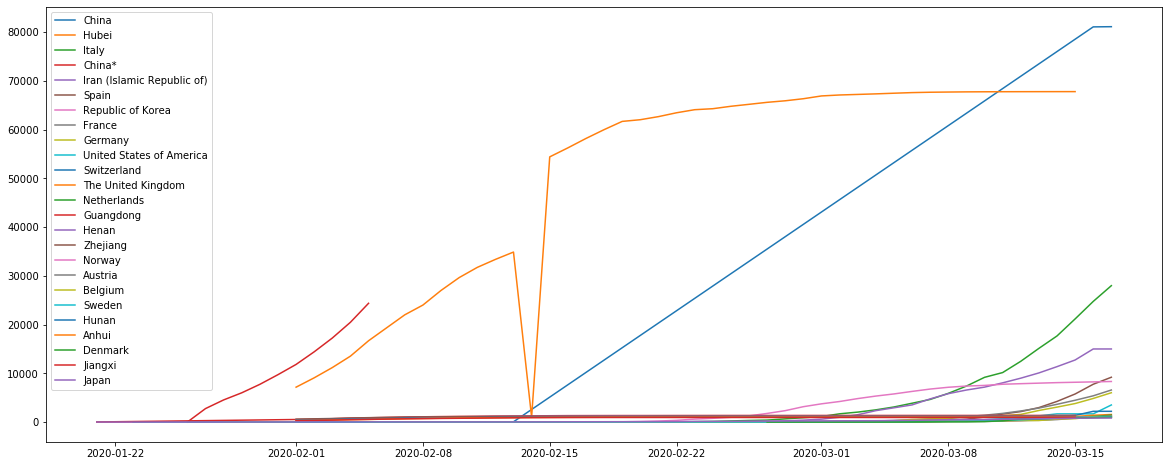

In [13]:
def plotAndSave(d, countries, column_x,path):
    plt.figure(figsize=(20,8))
    for country in countries:
        plt.plot( column_x, 'cases', data=d[d['name']==country], marker='', label=country)
    plt.legend()
    plt.savefig(path)
    
path = 'epidemiologicalCurveByCountryWithHubei.png'
plotAndSave(d, countries, 'date', path)

In [14]:
# check the rows about Hubei that have less than 10k cases, it is strange the value for the 14th February 2020
anomalies = d.loc[(d['name']=='Hubei') & (d['date']>=datetime.datetime(2020,2,13)) & (d['date']<=datetime.datetime(2020,2,16)),['name','values','idx_cases','cases']]
anomalies.style.set_properties(subset=['values'], **{'width-min': '300px'}) # increase width for value column in order to visualize all values
# the right value for 2020 02 14 is 51986 but in values there is 51 and 986 separated (this is caused by parsing problems)

,name,values,idx_cases,cases
3855,Hubei,"[5917, 34874]",1,34874
3785,Hubei,"[5917, 1728, 3095, 4823, 1154, 116, 36, 602, 15, 384, 51, 986, 1318]",-2,986
3714,Hubei,"[5917, 1282, 1138, 2420, 1216, 139, 37884, 16522, 54406, 1457]",-2,54406
3642,Hubei,"[5917, 955, 888, 1843, 1036, 139, 38839, 17410, 56249, 1596]",-2,56249


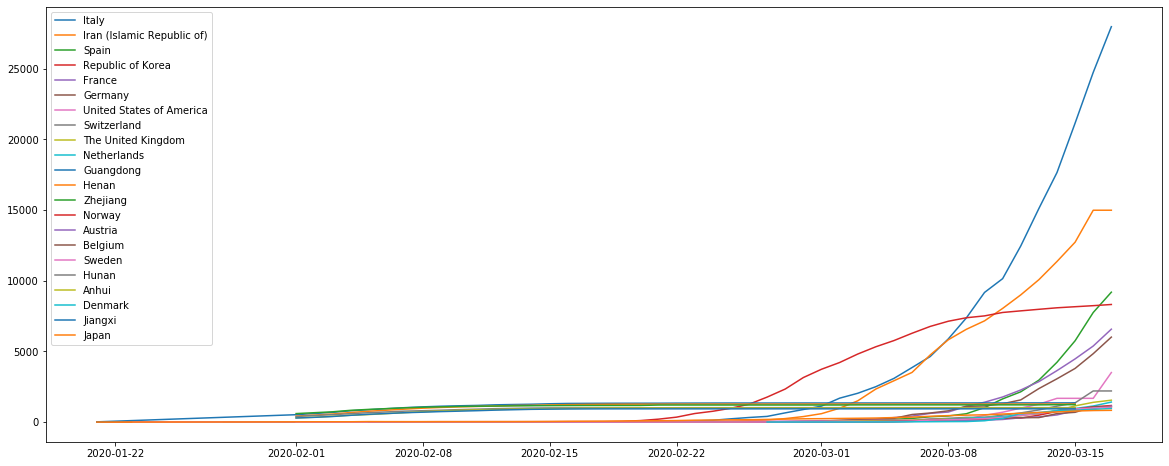

In [15]:
countries = [c for c in countries if c != 'Hubei' and 'China' not in c]
path = 'epidemiologicalCurveByCountry.png'
plotAndSave(d, countries, 'date', path)

In [16]:
# let's compare trend among differenc countries
# get date for each country in wich began 50 or more cases
def getRelDayDt(d,cases):
    dates=d[d['cases']>=cases].groupby('name').agg({'date':['first']})
    dates.columns = ['_'.join(col) for col in dates.columns]
    dates=dates.reset_index()
    dd=d.merge(dates, on='name', how='left')
    dd['day']=(dd['date']-dd['date_first']).dt.days
    return dd

dd = getRelDayDt(d,50)

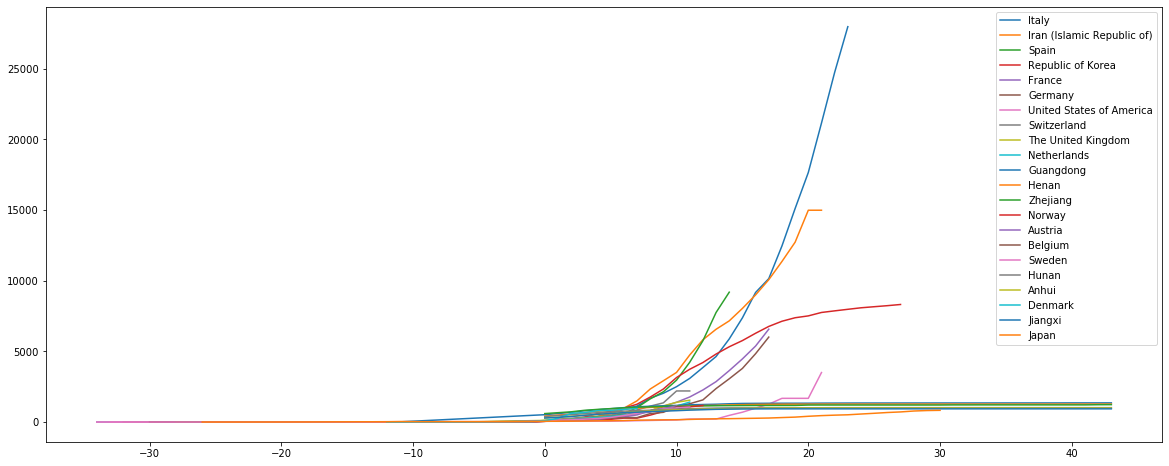

In [17]:
path = 'epidemiologicalCurveByCountryRel.png'
plotAndSave(dd, countries, 'day', path)

In [18]:
countries = ['Italy','Republic of Korea','Iran','Spain','France','Germany','United States of America']

esc_lst = [re.escape(s) for s in countries]
pattern = '|'.join(esc_lst)
dt = dd[(dd['name'].str.contains(pattern, case=False)) & (dd['day']>-6)]

a=dt.pivot_table(index=['day'],columns=['name'],values=['cases'],aggfunc=np.sum)
a.columns=a.columns.droplevel()
a.to_csv('casesByCountry.csv')
a

name,France,France^^,Germany,Iran (Islamic Republic of),Italy,Republic of Korea,Spain,United States of America
day,,,,,,,,
-5.0,12.0,NaN,16.0,2.0,3.0,28.0,12.0,15.0
-4.0,12.0,NaN,16.0,5.0,3.0,28.0,25.0,15.0
-3.0,12.0,NaN,18.0,18.0,3.0,29.0,32.0,35.0
-2.0,18.0,NaN,21.0,28.0,3.0,30.0,45.0,35.0
-1.0,38.0,NaN,26.0,43.0,9.0,31.0,45.0,35.0
0.0,57.0,282.0,57.0,61.0,76.0,51.0,114.0,53.0
1.0,100.0,NaN,57.0,95.0,124.0,104.0,151.0,53.0
2.0,100.0,NaN,129.0,141.0,229.0,204.0,198.0,59.0
3.0,191.0,NaN,157.0,245.0,322.0,346.0,257.0,59.0


In [19]:
p=pandas.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')
p['cases']=p['totale_casi']
p['date']=p['data']
p['date']=pandas.to_datetime(p['data'])
p ['name']=p['denominazione_regione']
p['name']=p['name'].str.replace('Friuli V. G. ','Friuli Venezia Giulia')
p.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,cases,date,name
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5,0,2020-02-24 18:00:00,Abruzzo
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,2020-02-24 18:00:00,Basilicata
2,2020-02-24 18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1,0,2020-02-24 18:00:00,P.A. Bolzano
3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1,0,2020-02-24 18:00:00,Calabria
4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10,0,2020-02-24 18:00:00,Campania


In [20]:
min_cases=100
cm = getCountriesWithHighestCases(p, min_cases)
countries = cm['name']#[ c for c in cm['name'] if c != 'In fase di definizione/aggiornamento']
countries

8                 Lombardia
4            Emilia Romagna
20                   Veneto
13                 Piemonte
9                    Marche
17                  Toscana
7                   Liguria
6                     Lazio
5     Friuli Venezia Giulia
3                  Campania
12              P.A. Trento
14                   Puglia
11             P.A. Bolzano
16                  Sicilia
0                   Abruzzo
18                   Umbria
19            Valle d'Aosta
15                 Sardegna
2                  Calabria
Name: name, dtype: object

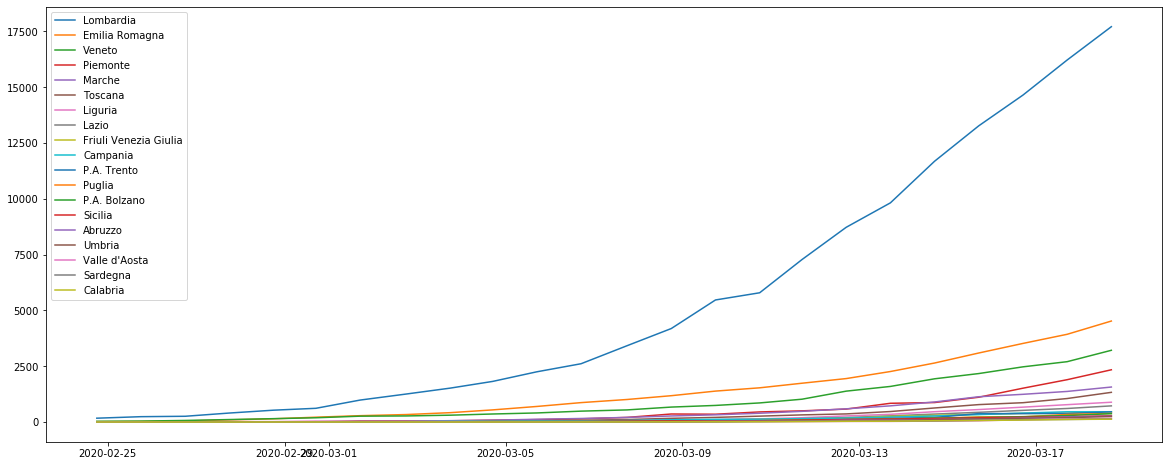

In [21]:
path = 'epidemiologicalCurveByRegionITA.png'
plotAndSave(p, countries, 'date', path)

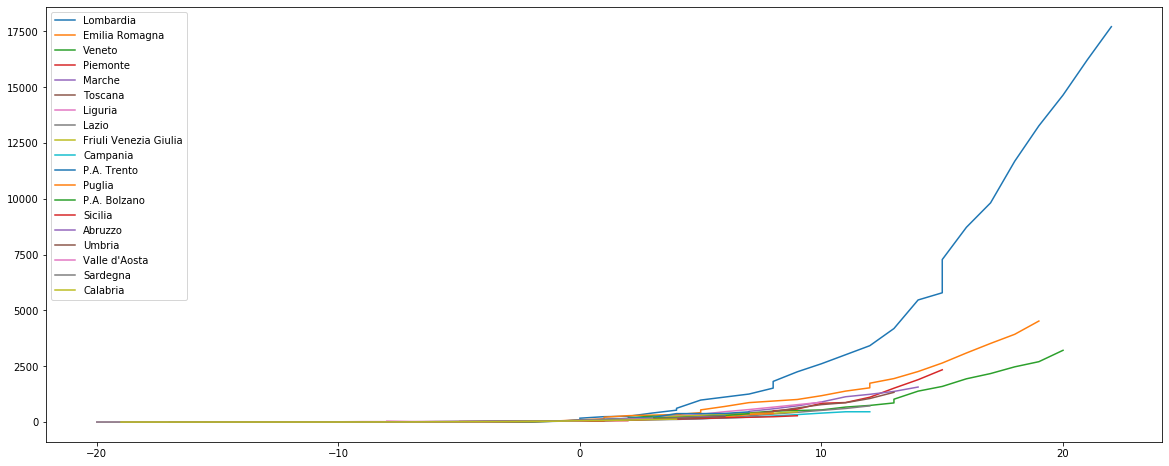

In [22]:
dd = getRelDayDt(p,50)
path = 'epidemiologicalCurveByRegionITARel.png'
plotAndSave(dd, countries, 'day', path)

In [23]:
p=pandas.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv')
p['cases']=p['totale_casi']
p['date']=p['data']
p['date']=pandas.to_datetime(p['data'])
p ['name']=p['denominazione_provincia']
p.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,cases,date,name
0,2020-02-24 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,0,2020-02-24 18:00:00,Chieti
1,2020-02-24 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,0,2020-02-24 18:00:00,L'Aquila
2,2020-02-24 18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,0,2020-02-24 18:00:00,Pescara
3,2020-02-24 18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,0,2020-02-24 18:00:00,Teramo
4,2020-02-24 18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0,0,2020-02-24 18:00:00,In fase di definizione/aggiornamento


In [24]:
min_cases=200
cm = getCountriesWithHighestCases(p, min_cases)
countries = [ c for c in cm['name'] if c != 'In fase di definizione/aggiornamento']
countries

['Bergamo',
 'Brescia',
 'Milano',
 'Cremona',
 'Lodi',
 'Piacenza',
 'Torino',
 'Pavia',
 'Pesaro e Urbino',
 'Padova',
 'Parma',
 'Verona',
 'Rimini',
 'Treviso',
 'Roma',
 'Modena',
 'Mantova',
 'Lecco',
 'Trento',
 'Venezia',
 "Reggio nell'Emilia",
 'Ancona',
 'Monza e della Brianza',
 'Bologna',
 'Vicenza',
 'Genova',
 'Bolzano',
 'Alessandria',
 'Firenze',
 'Como',
 'Varese',
 'Napoli',
 'Lucca']

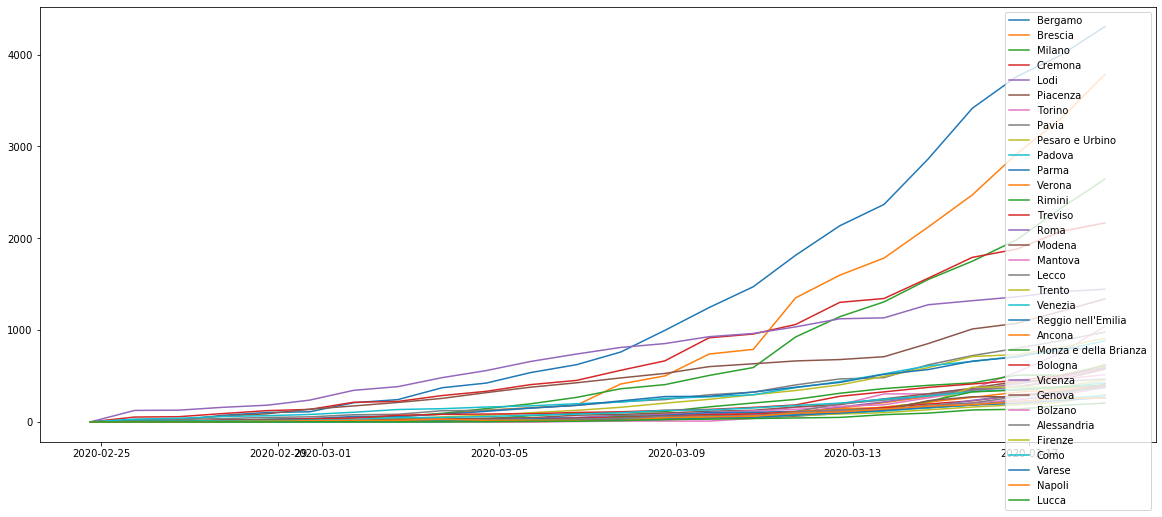

In [25]:
path = 'epidemiologicalCurveByProvinceITA.png'
plotAndSave(p, countries, 'date', path)

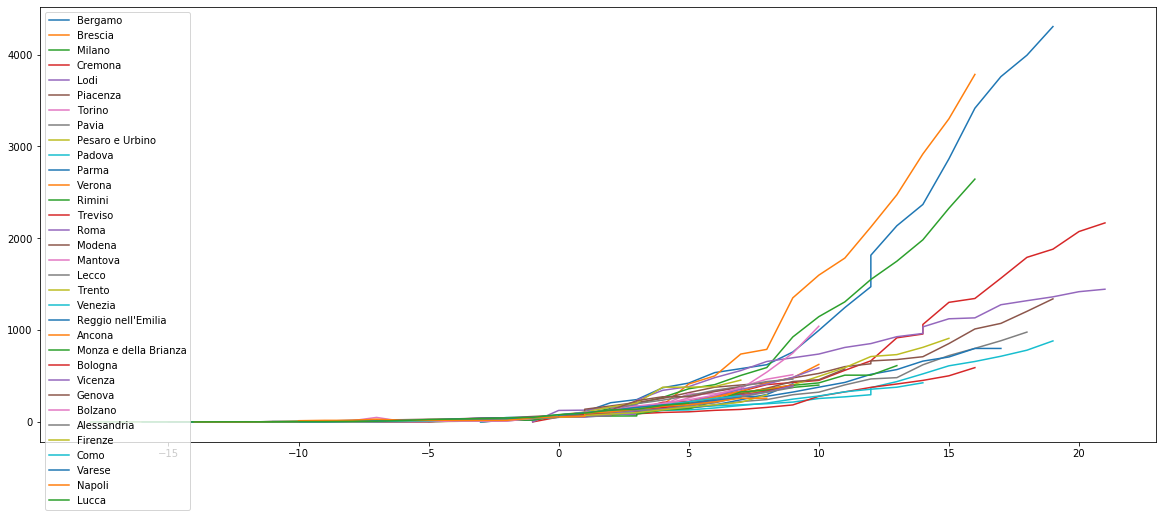

In [26]:
dd = getRelDayDt(p,50)
path = 'epidemiologicalCurveByProvinceITARel.png'
plotAndSave(dd, countries, 'day', path)